# Analysis of the TLGL leukemia model apoptosis/proliferation Boolean model

Analyzing timing of the T-LGL leukemia model by Zhang et al. 2008. Based on unpublished work by Ruscone et al. Original notebook can be found [here](https://github.com/PhysiBoSS/PhysiBoSS/blob/development/sample_projects_intracellular/boolean/tutorial/scripts/CellFate_Analysis.ipynb) and it accompanies the unpublished work by Ruscone et al. available [here](https://github.com/PhysiBoSS/PhysiBoSS/blob/development/sample_projects_intracellular/boolean/tutorial/paper/)PhysiBoSS_tutorial_main_text.pdf.

We thank the authors of that work for early access to this work. 


Model file translated to MaBoSS format by John Metzcar. 

###


## Overview

This is to determine the time (number of updates if in discrete mode) required for the TLGL leukemia model to reach steady state which will then be used in the T-LGL leukemia PhysiBoSS model.

Because our pipeline produced 30 model variants to test - we do analysis on the base TLGL model and each of the 30 variants. We use the longest time required to set our `max_time` in the PhysiBoSS models. 

We start with the base line model and then run the variants in sequence and produce preliminary convergence results for the model runs. 

The result was that we selected a max time of 2000 with a tick time of 1.0 as sufficient to reach the steady state in the model with the longest transients. 

To note it: for use in PhysiBoSS, this means that whatever `dt_intracellular` is, then the `scaling` factor will be dt_intracellular (in minutes)/2000. To provide an examle, if `dt_intracellular` = 1440 minutes (1 day), then `scaling` will be 0.72 to ensure a steady state in the cells' Boolean networks. If the model isn't being run to steady state but should still reach steeady state after 24 hours, then one would keep `scaling` the same, meaning that a cell's BN will update (and read out) not necessarily at steady state - but would reach steady state if the outputs remained constant OVER 24 hours. 

### Dependencies

NOTE: The required imports can be obtained by running the instructions in the README file. 

_They are reproduced here for conveience:_

To install dependencies, you can use conda and run :

`conda env create --file environment.yml`

and then activate your environment with :

`conda activate tutorial-notebooks`

Finally, you can run Jupyter Lab and open the notebooks :

`jupyter-lab`

In [1]:
import maboss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from tools import to_bits, to_istates, change_input

### Survival attractor ratios model

this determines the ratio of P2 ON/OFF attractors, starting from ... I'll have to do this later - not sure what we would do - because we woudl have to remove the dead ones ... 

In [166]:
# Set up the required files
# path = "../config/"

# BND_file = "TLGL.bnd"
# CFG_file = "TLGL.cfg"

# bnd_file = os.path.join(path, BND_file)
# cfg_WT = os.path.join(path, CFG_file)

In [169]:
# # Settings for the simulation

# param = {'max_time': 1000, 'time_tick': 1.0, 'sample_count': 100000, 'thread_count' : 16, 'discrete_time' : 0} # I'll assume that these parameters override whatever is in the config file
# outputs = ['Apoptosis']

In [2]:
# # run base model and review the results

# b_sim = maboss.load(bnd_file, cfg_WT)    
# b_sim.param.update(param)
# b_sim.network.set_output(outputs)
# # run the simulation
# b_res = b_sim.run()
# model = "base_model"
# b_res.plot_piechart()
# plt.title("Base Model")
# plt.savefig("leukemia_model_analysis/" + model + "_PieChart" + ".png",  bbox_inches='tight')
# plt.show()

# b_res.plot_trajectory(prob_cutoff=0) 

# figure_name = "leukemia_model_analysis/" + model + '.png'
# plt.savefig(figure_name,  bbox_inches='tight')
# plt.show()

## Model variations from solutions to the target control problem

Next, we show the model variations - which are generated from the base model file - and run the selected solutions to the target control problem them in the MaBoSS framework.

In this case we are starting the models in one of two survival attractors, which differ by only one node P2. In these experiments, we assume that simulating trajectories in a 50/50 split is appropriate. dd

Find model files

In [4]:
# Set up the required files
path = "../leukemia_model_files/"

# make a list of all the bnd files (MaBoSS model files) in the directory of interest
BNDFiles = [file for files in os.walk(path, topdown=True)
                     for file in files[2] if file.endswith(".bnd")]
print('bnd files in the directory tree are ')
for r in BNDFiles:
    print(r)

bnd files in the directory tree are 
IB_pro_Fas.bnd
SM_pro_Ceramidepro_GRB2.bnd
SM_anti_SPHK1.bnd
IB_pro_FasT.bnd
SM_pro_Ceramidepro_PI3Kpro_MEK.bnd
SM_pro_Ceramidepro_PI3Kpro_ERK.bnd
EG_S1P_PDGFR_0.bnd
IB_anti_SPHK1.bnd
IB_pro_Ceramide.bnd
EG_MCL1_BID_0.bnd
SM_pro_Ceramidepro_RAS.bnd
SM_pro_Ceramidepro_IL2RB.bnd
SM_pro_Ceramidepro_IL2RBT.bnd
EG_PDGFR_SPHK1_0.bnd
IB_anti_sFas.bnd
EG_RAS_MEK_0.bnd
SM_pro_TBETpro_Ceramidepro_ERK.bnd
EG_PI3K_ERK_0.bnd
EG_GAP_RAS_1.bnd
IB_pro_FasL.bnd
EG_IL15_GAP_0.bnd
EG_JAK_STAT3_0.bnd
IB_pro_TBET.bnd
SM_anti_S1P.bnd
IB_pro_DISC.bnd
IB_anti_S1P.bnd
IB_anti_PDGFR.bnd
EG_Ceramide_S1P_1.bnd
EG_IL2RB_MCL1_0.bnd
EG_IL2RBT_IL2RB_0.bnd
SM_anti_PDGFR.bnd


Settings for the simulations

In [13]:
# Settings for the simulation

param = {'max_time': 400, 'time_tick': 1.0, 'sample_count': 10000, 'thread_count' : 16, 'discrete_time' : 0} # I'll assume that these parameters override whatever is in the config file
outputs = ['Apoptosis']

# some very fast transients seemed to be present in some models - I'll run less so they are easer to see

Run simulations and save out the percentage charts for final states (apoptotic or not apoptotic)

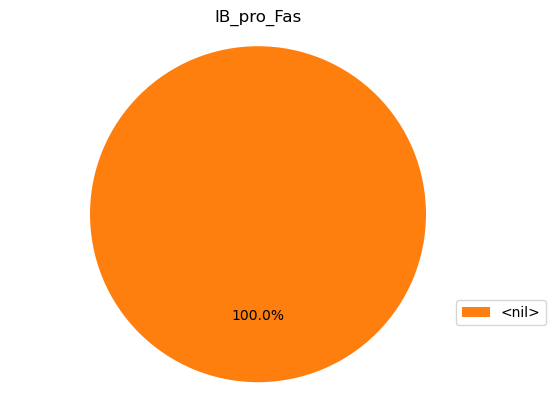

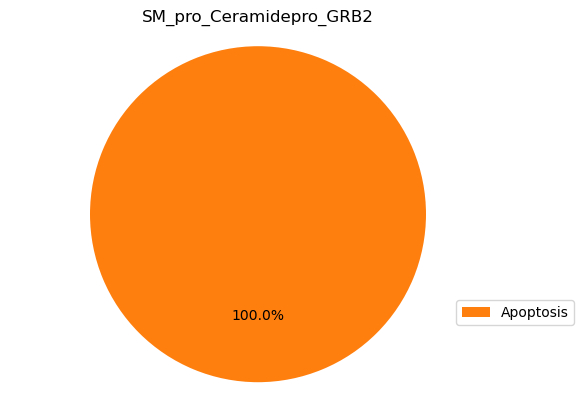

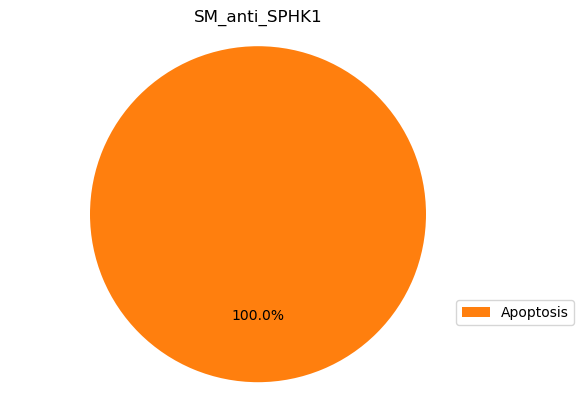

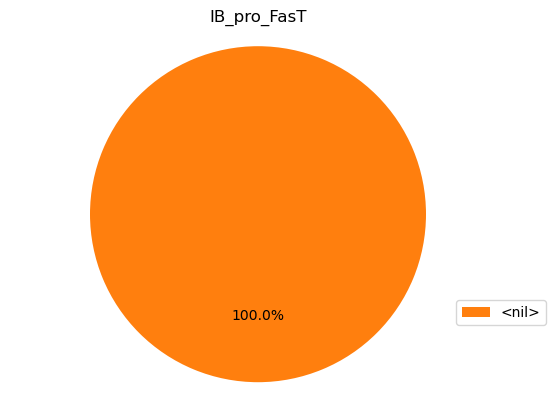

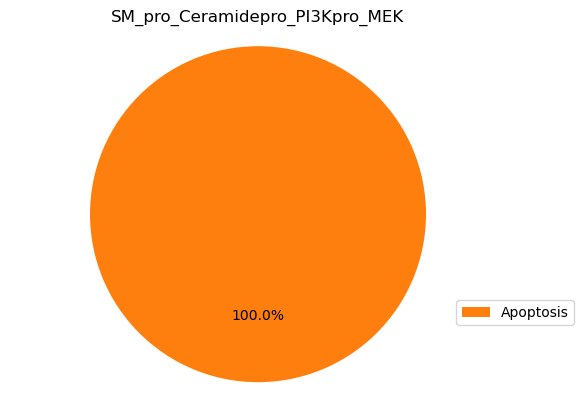

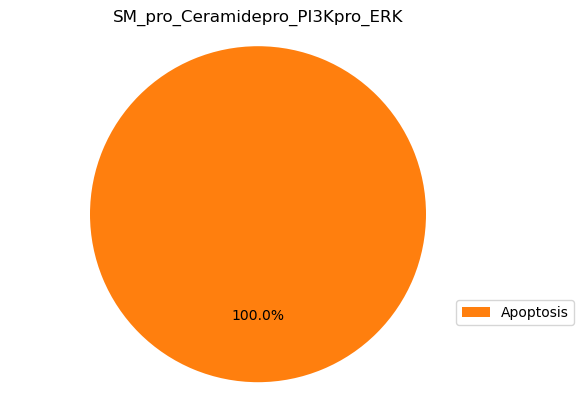

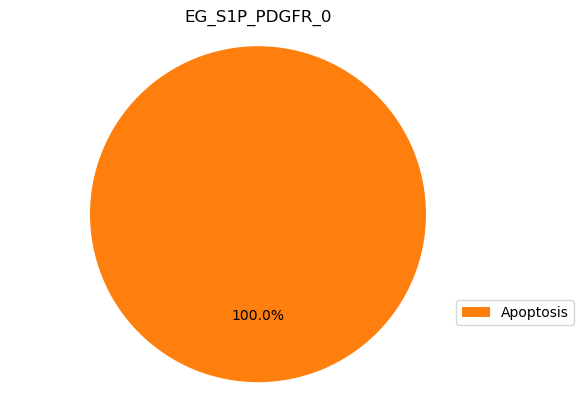

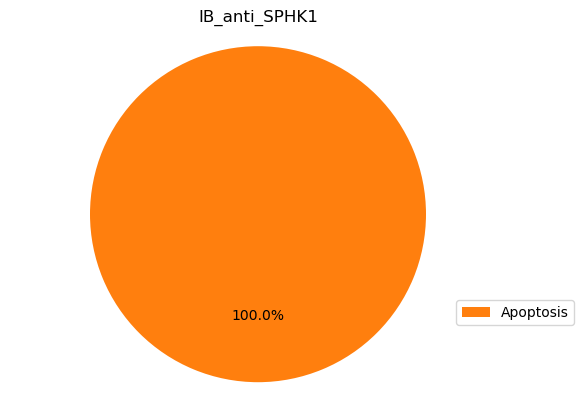

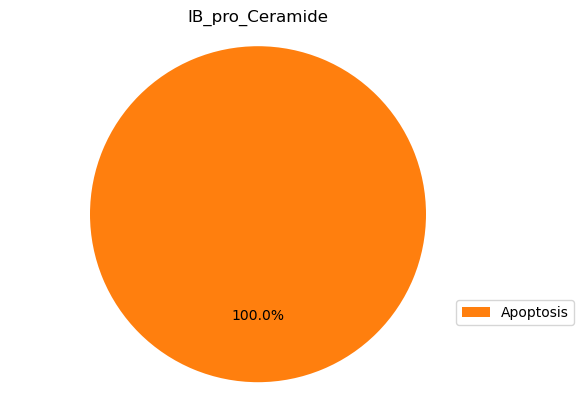

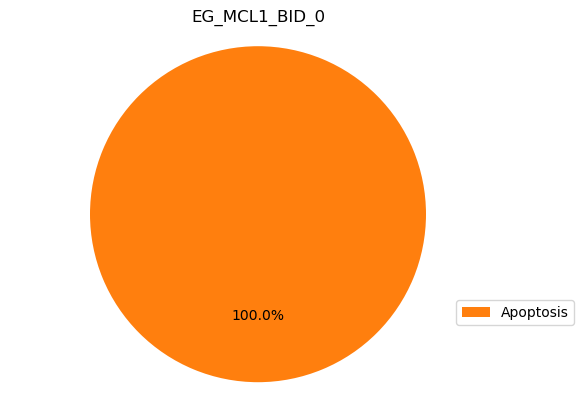

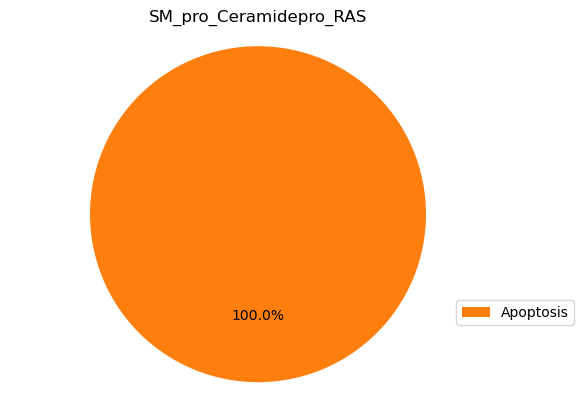

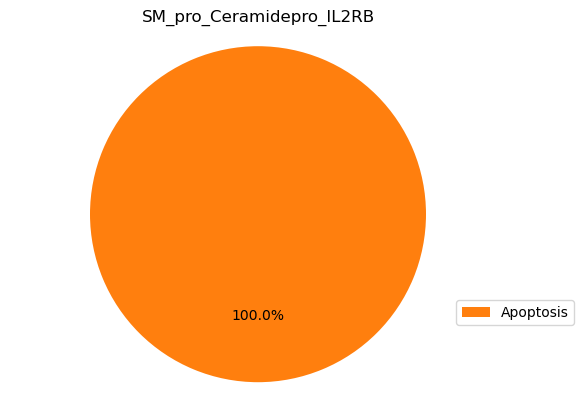

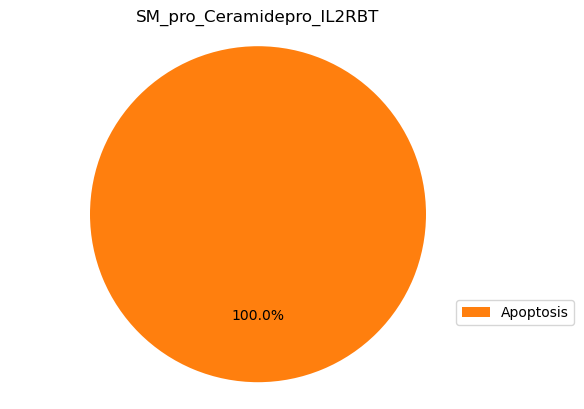

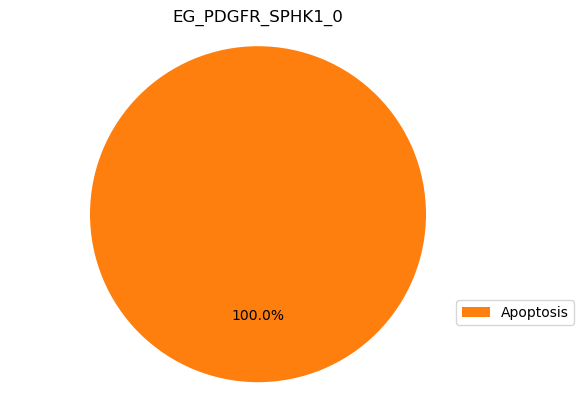

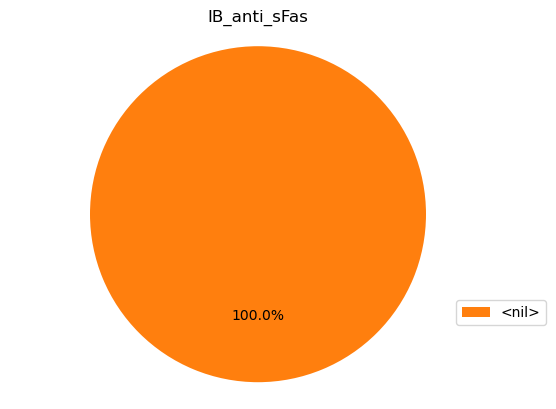

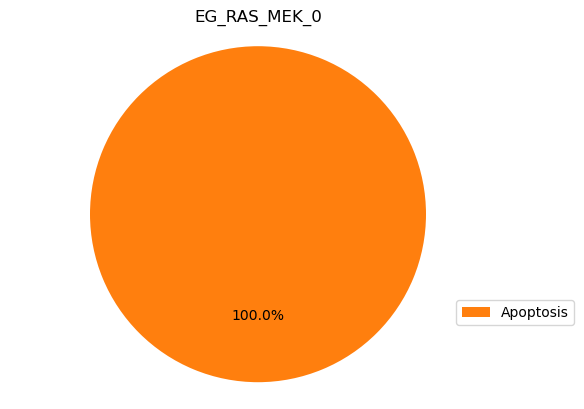

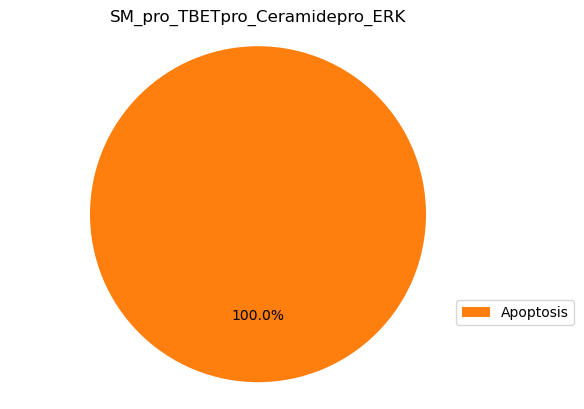

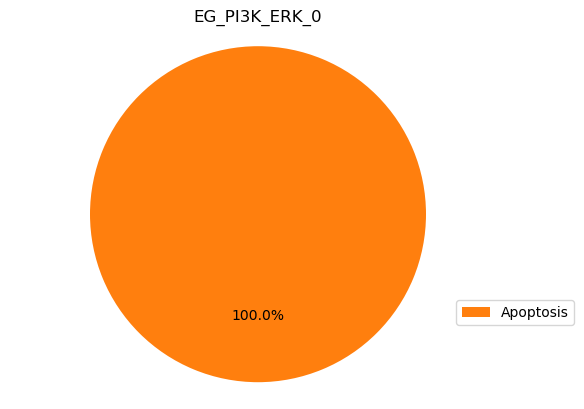

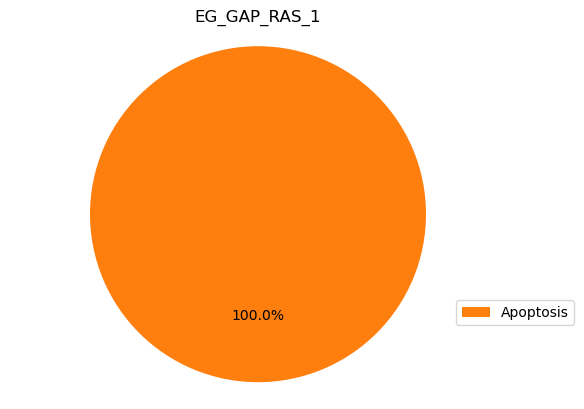

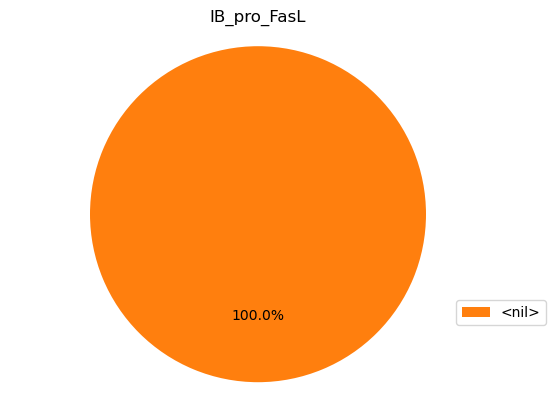

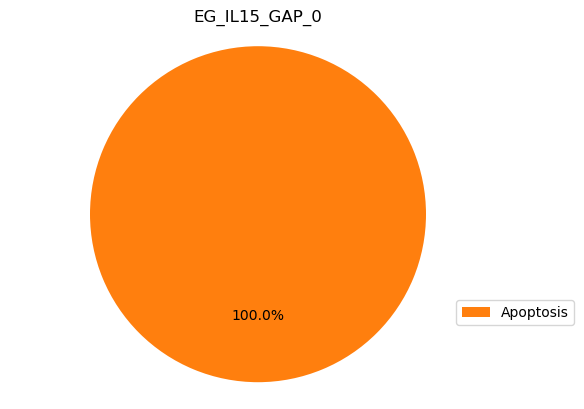

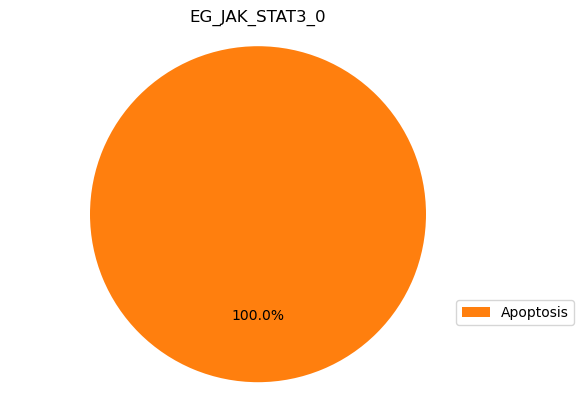

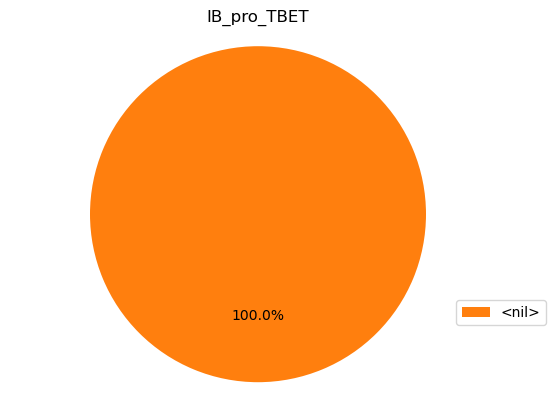

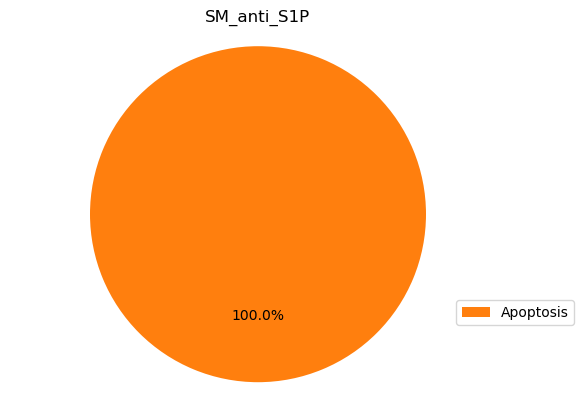

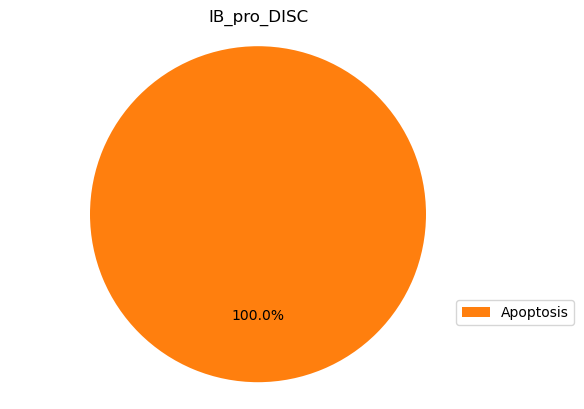

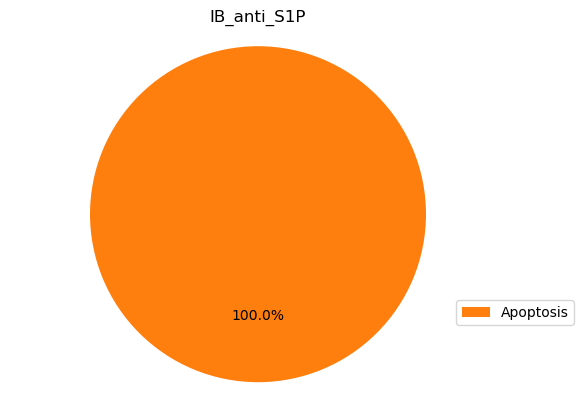

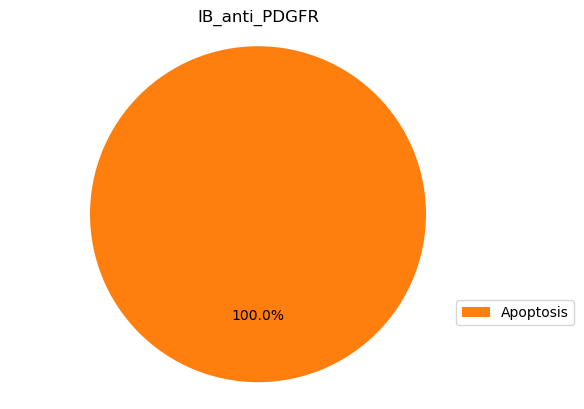

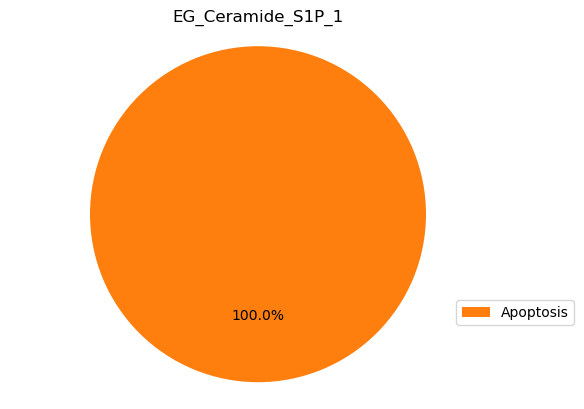

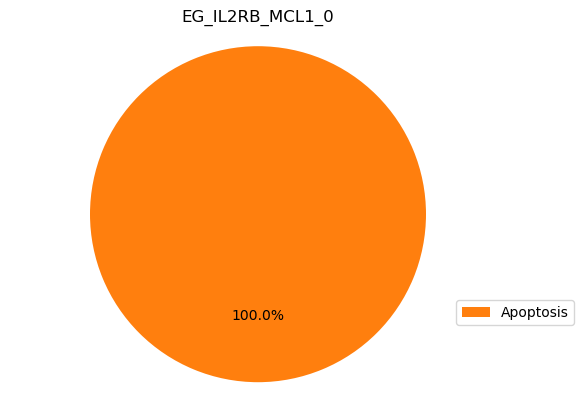

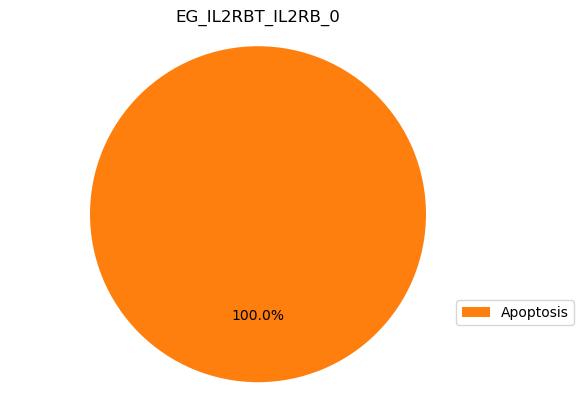

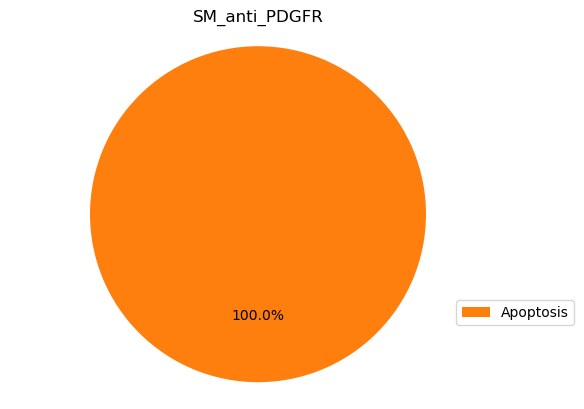

In [16]:
# loop through the bnd files and load them into MaBoSS and run the simulation
results = {}
for model_file in BNDFiles:
    # print(model_file)
    bnd_file = os.path.join(path, model_file)
    cfg_WT = os.path.join(path, model_file.replace(".bnd", ".cfg"))
    model = model_file.replace(".bnd", "")
    # print(cfg_WT)
    b_sim = maboss.load(bnd_file, cfg_WT)

    # With model loaded, now setting up the interventions
    # Set the initial state of the model
    # Current best solution without parsing the intervention node from the file name
    # Get nodes from the network
    nodes = list(b_sim.network.keys())
    # loop through all nodes in model
    for node in nodes:
        # split the node name by the underscore: Only nodes with an underscore are interventions (except for Cytoskeleton), and thus only they have a length greater than 1
        possible_intervention_node = node.split("_")
        if len(possible_intervention_node) > 1:
            # remove cytoskeleton node from list
            if possible_intervention_node[0] == 'Cytoskeleton':
                continue
            
            b_sim.network.set_istate(node, [0, 1]) # b_sim.network.set_istate('TNF', [0, 1]) --> from TNF Example. Also seeing this in the pyMaBoSS documentation (would reverse to set the node to 0)
            # print(node)
    
    # Nice solution that doesn't depend on looping through the nodes - which could cause problems if the node name is not as expected (if it has under scores in it for example)
    # Below: this will work well if we can get to SM_proCeramide_proPI3K_proERK --> each one then is simply a node name!
    # intervention = model_file.replace(".bnd", "")
    # # next remove first 3 characters from the intervention name
    # intervention = intervention[3:]
    # # now we need to parse out if there is more than one intervention
    # intervention = intervention.split("_")
    # # Might have to think about this - because the under score actually used to separate the pro/anti from the target
    # print(intervention)
    

    # Set the simulation parameters and outputs
    b_sim.param.update(param)
    b_sim.network.set_output(outputs)
    # run the simulation
    b_res = b_sim.run()
    results[model] = b_res
    # pause = input("Press Enter to continue...")
    b_res.plot_piechart()
    plt.title(model)
    plt.savefig("leukemia_model_analysis_from_attractor/" + model + "_PieChart" + ".png",  bbox_inches='tight')
    plt.show()

Display time courses, save them and the model data. 

Error directory already exists: leukemia_model_analysis_from_attractor/IB_pro_Fas


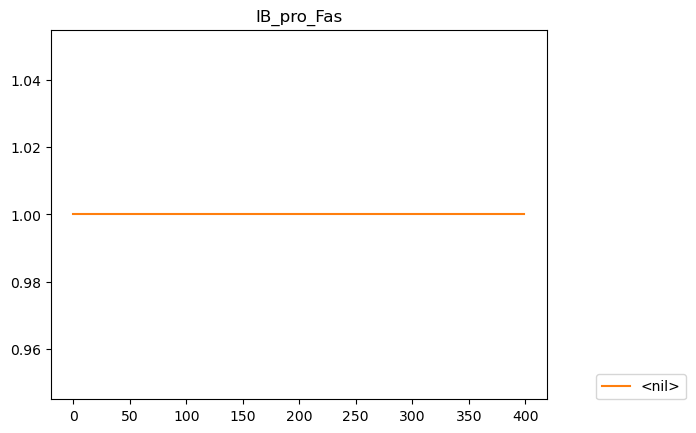

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_Ceramidepro_GRB2


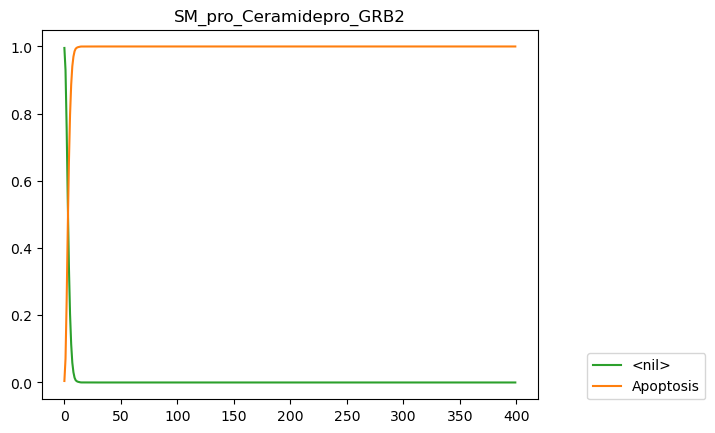

Error directory already exists: leukemia_model_analysis_from_attractor/SM_anti_SPHK1


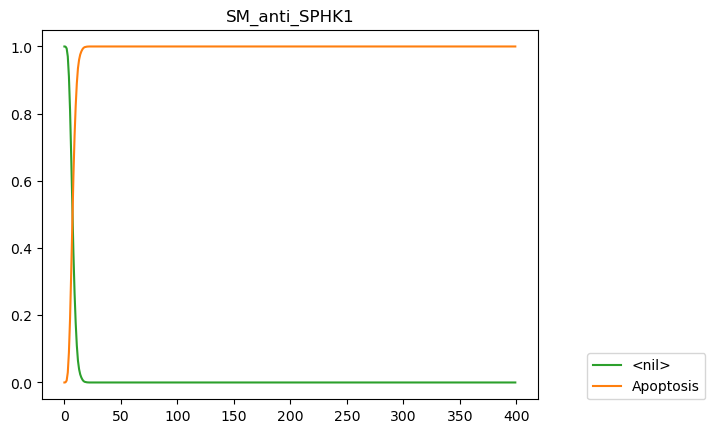

Error directory already exists: leukemia_model_analysis_from_attractor/IB_pro_FasT


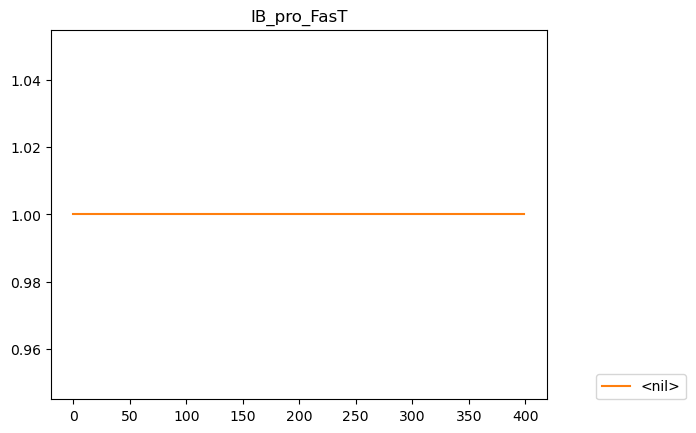

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_Ceramidepro_PI3Kpro_MEK


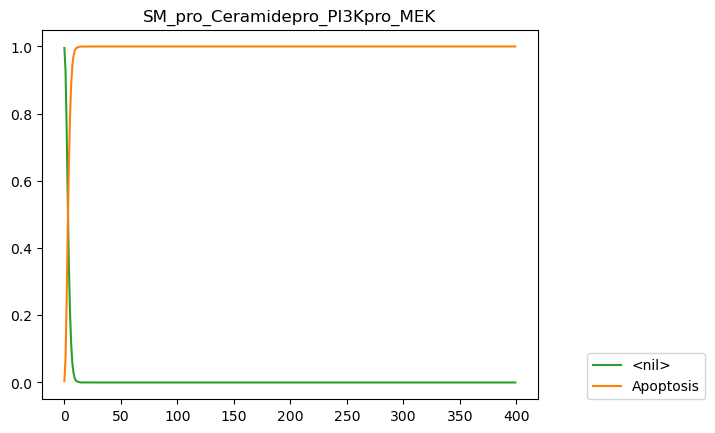

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_Ceramidepro_PI3Kpro_ERK


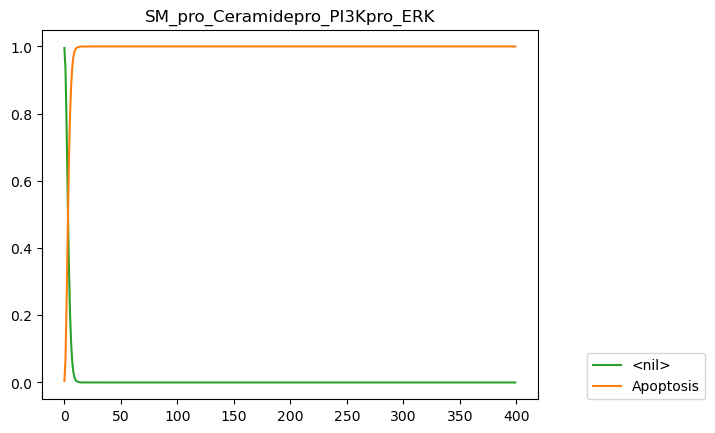

Error directory already exists: leukemia_model_analysis_from_attractor/EG_S1P_PDGFR_0


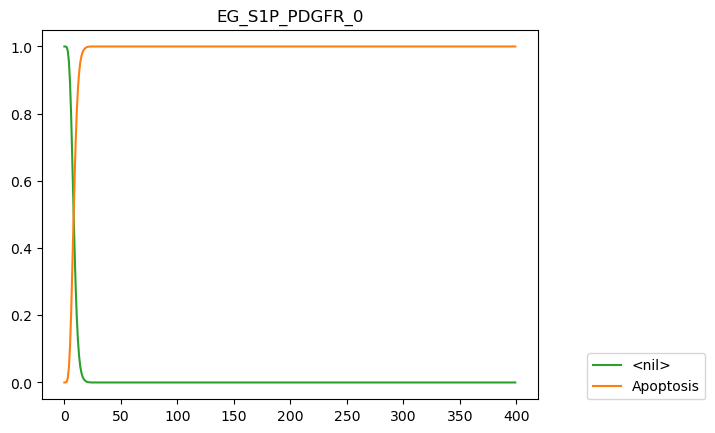

Error directory already exists: leukemia_model_analysis_from_attractor/IB_anti_SPHK1


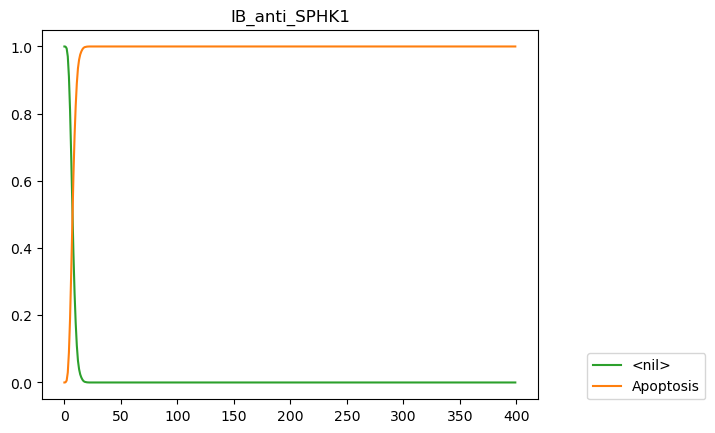

Error directory already exists: leukemia_model_analysis_from_attractor/IB_pro_Ceramide


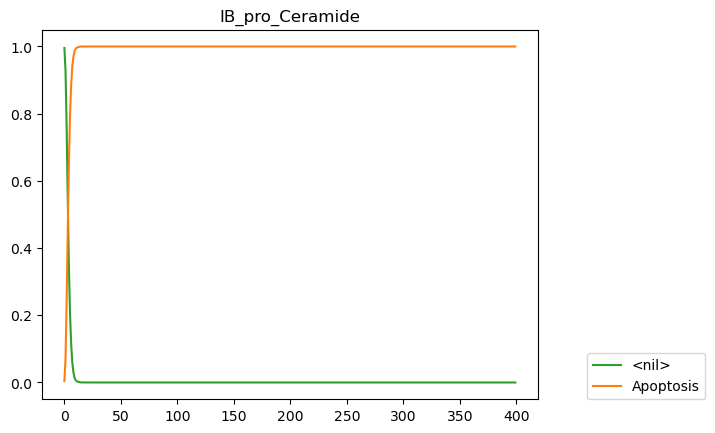

Error directory already exists: leukemia_model_analysis_from_attractor/EG_MCL1_BID_0


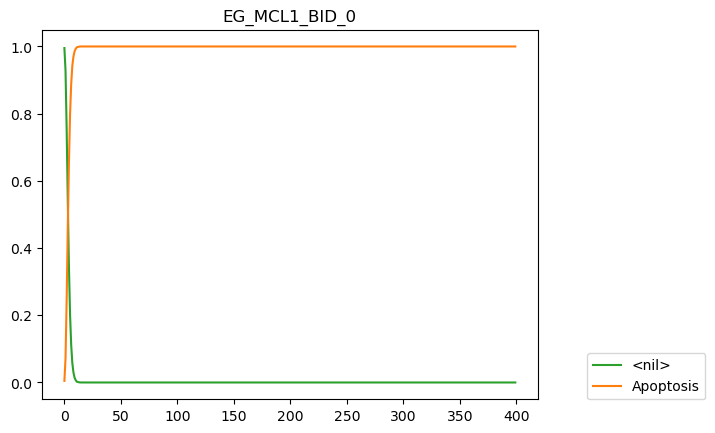

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_Ceramidepro_RAS


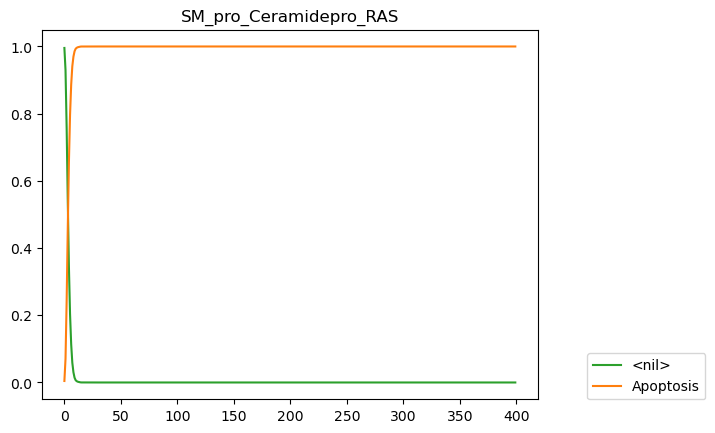

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_Ceramidepro_IL2RB


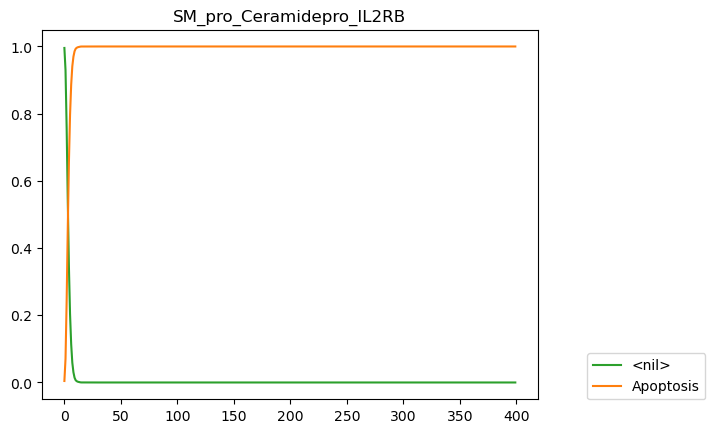

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_Ceramidepro_IL2RBT


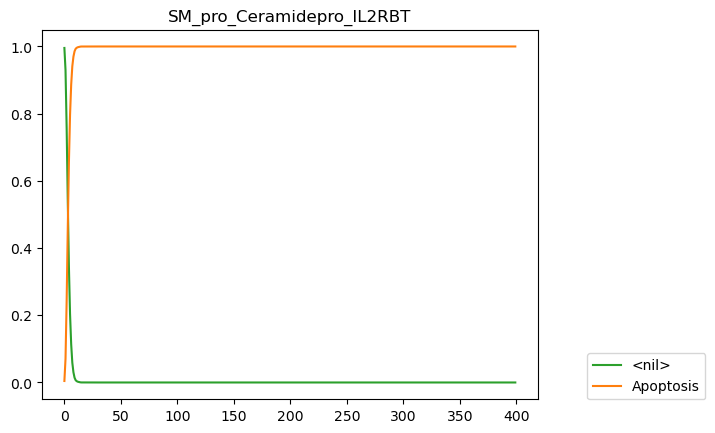

Error directory already exists: leukemia_model_analysis_from_attractor/EG_PDGFR_SPHK1_0


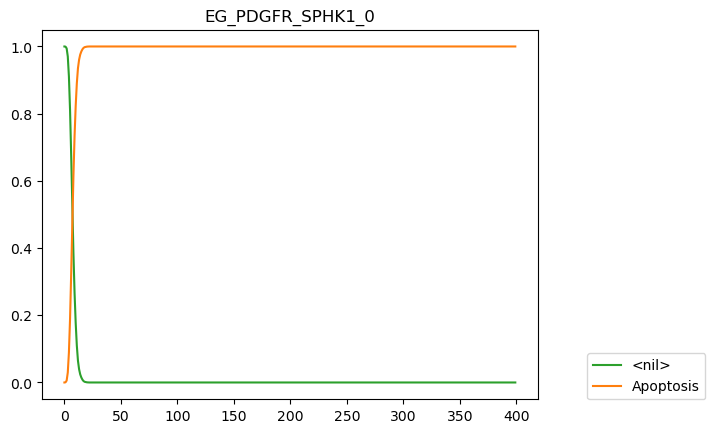

Error directory already exists: leukemia_model_analysis_from_attractor/IB_anti_sFas


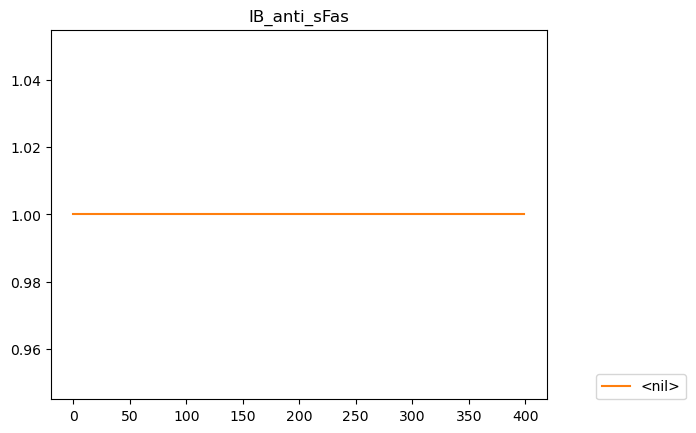

Error directory already exists: leukemia_model_analysis_from_attractor/EG_RAS_MEK_0


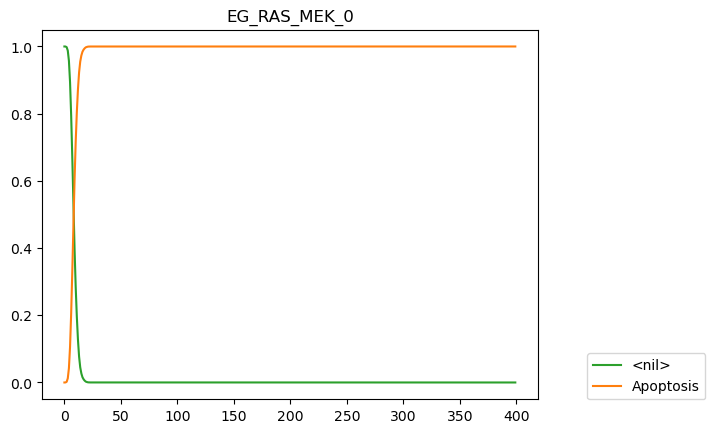

Error directory already exists: leukemia_model_analysis_from_attractor/SM_pro_TBETpro_Ceramidepro_ERK


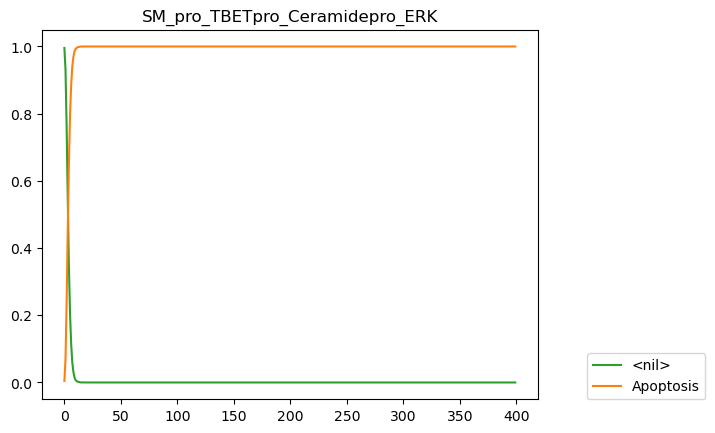

Error directory already exists: leukemia_model_analysis_from_attractor/EG_PI3K_ERK_0


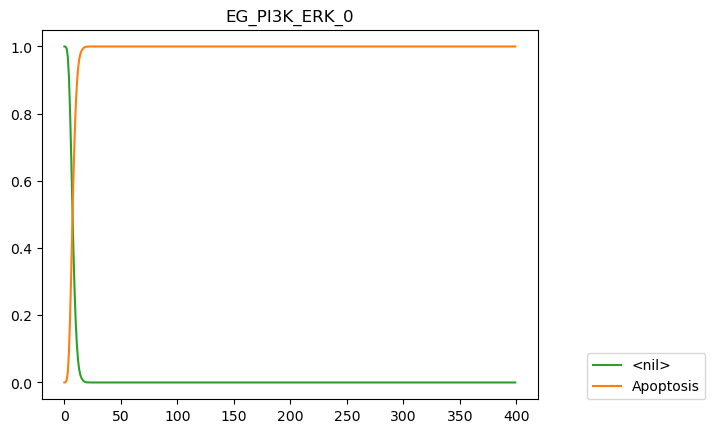

Error directory already exists: leukemia_model_analysis_from_attractor/EG_GAP_RAS_1


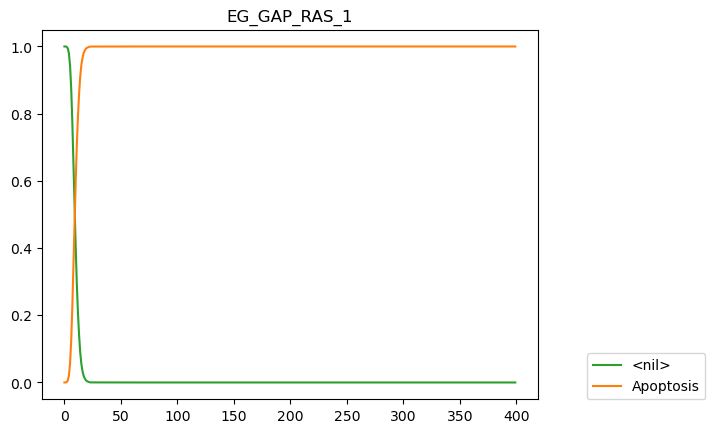

Error directory already exists: leukemia_model_analysis_from_attractor/IB_pro_FasL


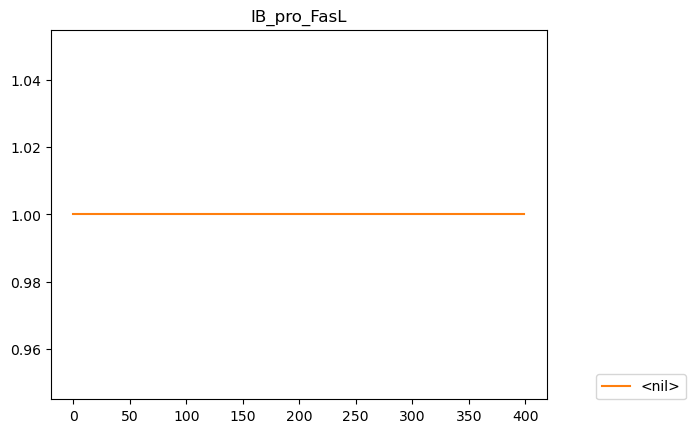

Error directory already exists: leukemia_model_analysis_from_attractor/EG_IL15_GAP_0


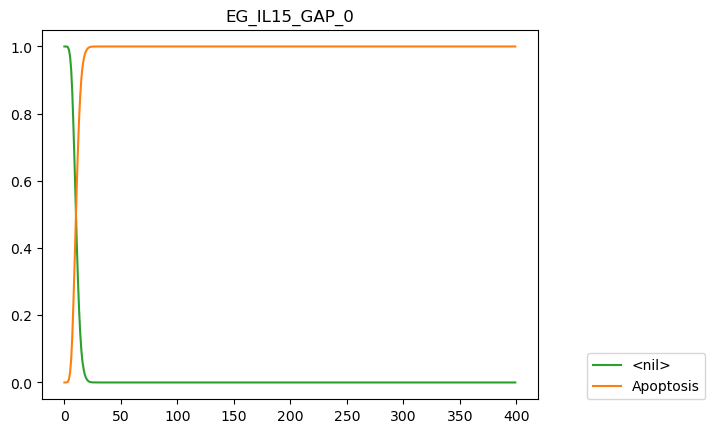

Error directory already exists: leukemia_model_analysis_from_attractor/EG_JAK_STAT3_0


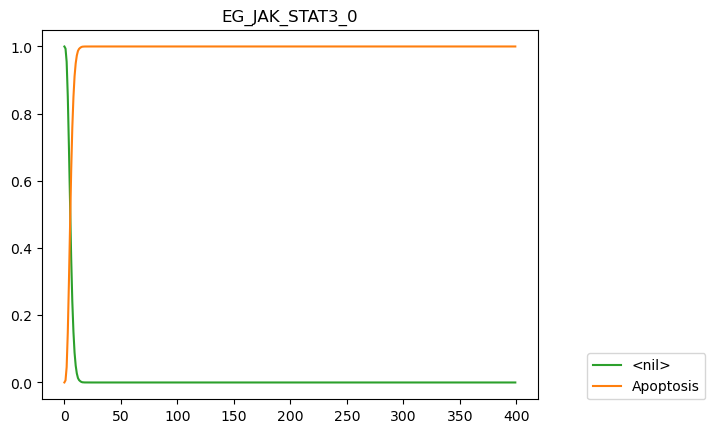

Error directory already exists: leukemia_model_analysis_from_attractor/IB_pro_TBET


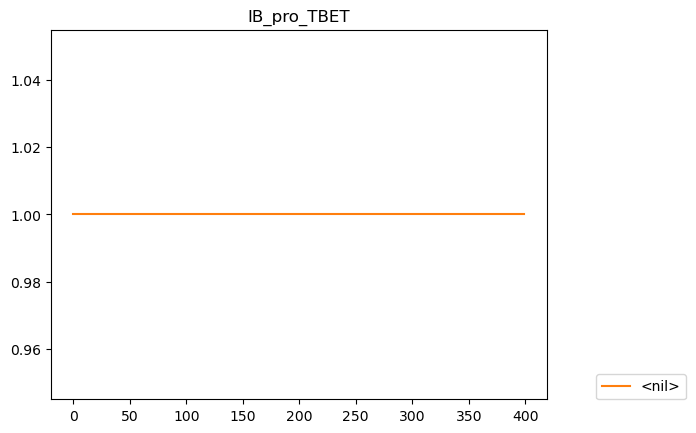

Error directory already exists: leukemia_model_analysis_from_attractor/SM_anti_S1P


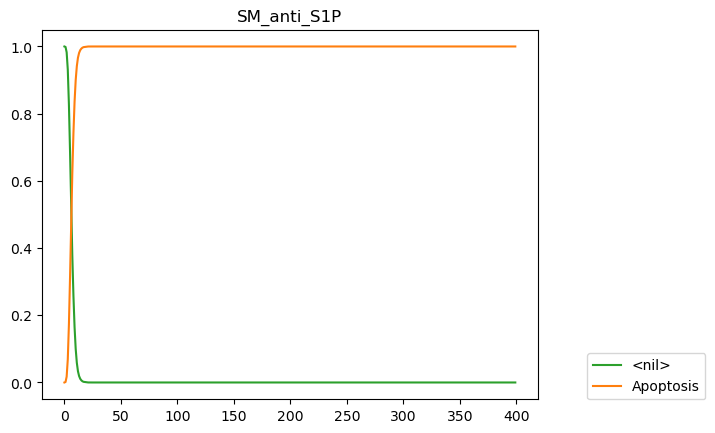

Error directory already exists: leukemia_model_analysis_from_attractor/IB_pro_DISC


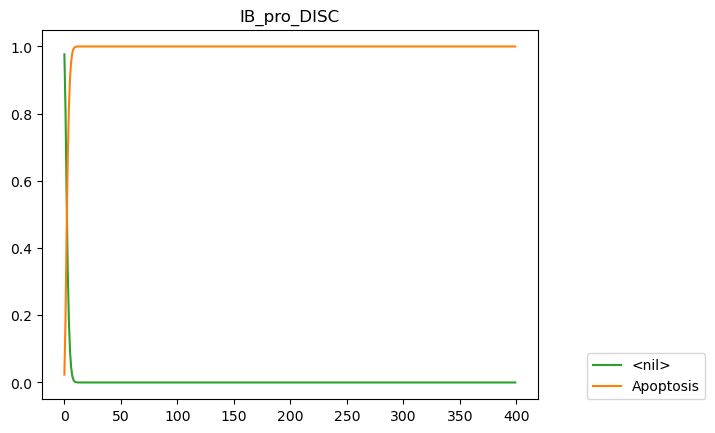

Error directory already exists: leukemia_model_analysis_from_attractor/IB_anti_S1P


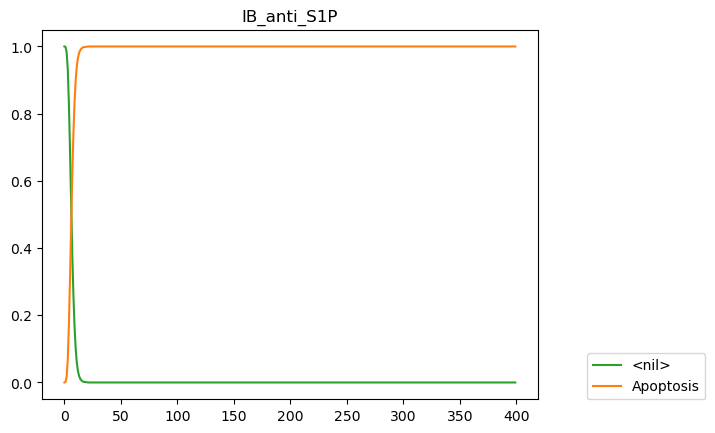

Error directory already exists: leukemia_model_analysis_from_attractor/IB_anti_PDGFR


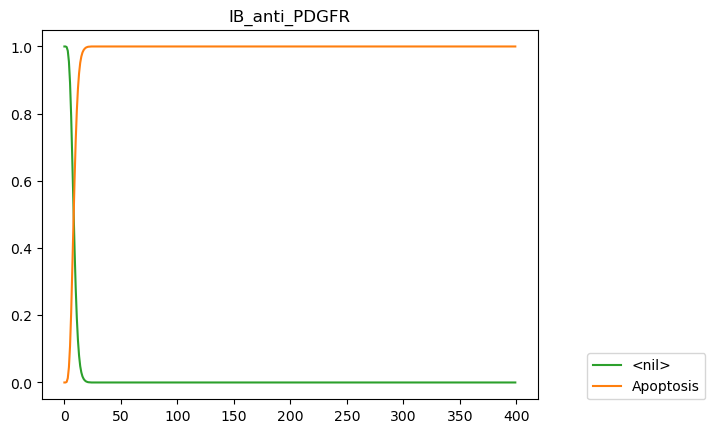

Error directory already exists: leukemia_model_analysis_from_attractor/EG_Ceramide_S1P_1


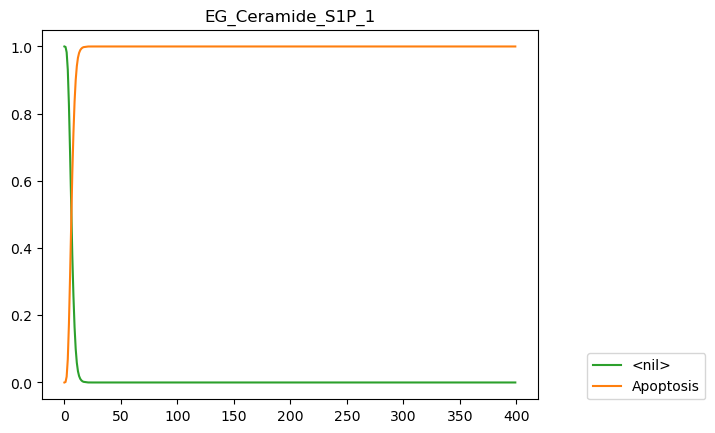

Error directory already exists: leukemia_model_analysis_from_attractor/EG_IL2RB_MCL1_0


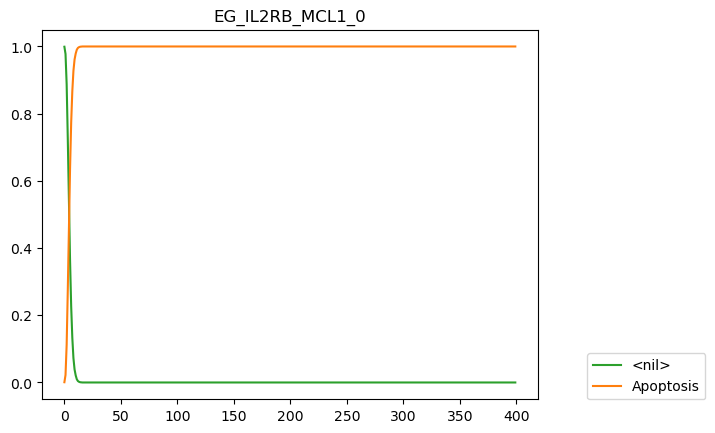

Error directory already exists: leukemia_model_analysis_from_attractor/EG_IL2RBT_IL2RB_0


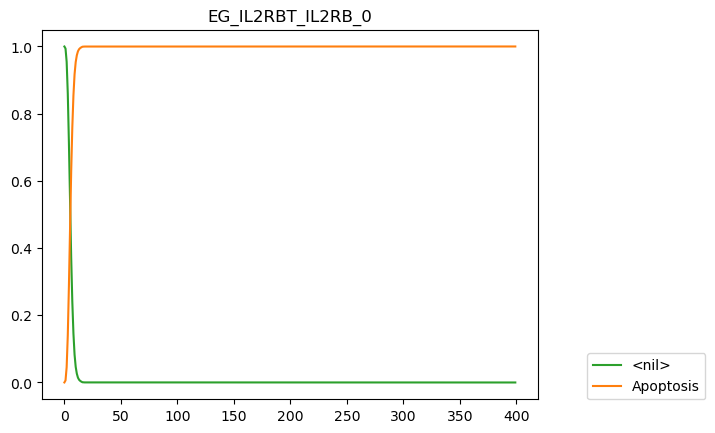

Error directory already exists: leukemia_model_analysis_from_attractor/SM_anti_PDGFR


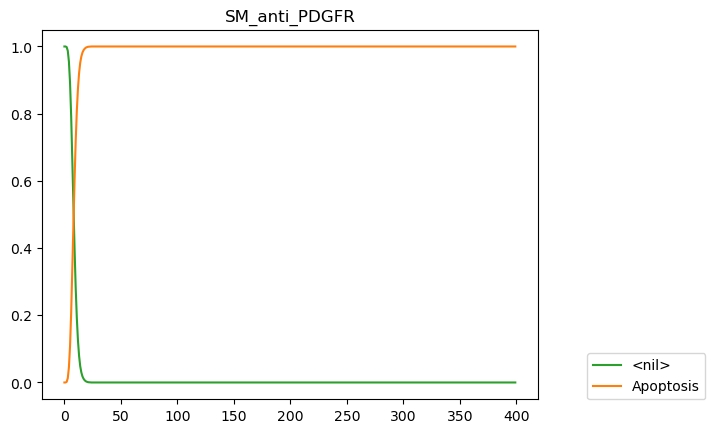

In [17]:
for key in results:
    results[key].plot_trajectory(prob_cutoff=0) 
    # plt.tight_layout()

    results[key].save("leukemia_model_analysis_from_attractor/" + key)
    plt.title(key)
    # plt.figure(figsize=(4,5))
    figure_name = "leukemia_model_analysis_from_attractor/" + key + '.png'
    plt.savefig(figure_name,  bbox_inches='tight')
    plt.show()
    
    # print(results[value].plot_piechart())

## Testing for steady state

In additiona to visual inspection of the model time courses, here we do a test for if dynamics are still occurring at the end of the simulations. 

We get the last 100 outputs, then take the mean of last 50 outputs and compare it to the mean of the 50 outputs before that. We then rank order the differences. 

In [155]:
differences = {}
for item in results:
    
    temp = results[item].get_states_probtraj().tail(100)
    last_51_100 = temp.head(50)
    last_50 = temp.tail(50)
    
    differences[item] =   last_51_100.mean()['Apoptosis']- last_50.mean()['Apoptosis']


4.61999999967766e-06
0.0
2.9000000000278803e-06
-2.1579999999521426e-05
0.0
0.0
8.780000000263577e-06
2.9000000000278803e-06
-4.119999999829815e-06
0.0
0.0
0.0
0.0
2.9000000000278803e-06
3.1979999999820485e-05
0.0
0.0
0.0
3.306000000080633e-05
-7.940000000150604e-06
0.0
2.077999999994251e-05
-1.9400000000890927e-06
0.0
-1.9400000000890927e-06
8.780000000263577e-06
-1.9400000000890927e-06
0.0
0.0
8.780000000263577e-06


In [156]:
differences

{'IB_pro_Fas': 4.61999999967766e-06,
 'SM_pro_Ceramidepro_GRB2': 0.0,
 'SM_anti_SPHK1': 2.9000000000278803e-06,
 'IB_pro_FasT': -2.1579999999521426e-05,
 'SM_pro_Ceramidepro_PI3Kpro_MEK': 0.0,
 'SM_pro_Ceramidepro_PI3Kpro_ERK': 0.0,
 'EG_S1P_PDGFR_0': 8.780000000263577e-06,
 'IB_anti_SPHK1': 2.9000000000278803e-06,
 'IB_pro_Ceramide': -4.119999999829815e-06,
 'EG_MCL1_BID_0': 0.0,
 'SM_pro_Ceramidepro_RAS': 0.0,
 'SM_pro_Ceramidepro_IL2RB': 0.0,
 'SM_pro_Ceramidepro_IL2RBT': 0.0,
 'EG_PDGFR_SPHK1_0': 2.9000000000278803e-06,
 'IB_anti_sFas': 3.1979999999820485e-05,
 'EG_RAS_MEK_0': 0.0,
 'SM_pro_TBETpro_Ceramidepro_ERK': 0.0,
 'EG_PI3K_ERK_0': 0.0,
 'IB_pro_FasL': 3.306000000080633e-05,
 'EG_IL15_GAP_0': -7.940000000150604e-06,
 'EG_JAK_STAT3_0': 0.0,
 'IB_pro_TBET': 2.077999999994251e-05,
 'SM_anti_S1P': -1.9400000000890927e-06,
 'IB_pro_DISC': 0.0,
 'IB_anti_S1P': -1.9400000000890927e-06,
 'IB_anti_PDGFR': 8.780000000263577e-06,
 'EG_Ceramide_S1P_1': -1.9400000000890927e-06,
 'EG_IL2R

In [158]:
# Sort differences by their aboslute values

sorted_differences = {k: v for k, v in sorted(differences.items(), key=lambda item: abs(item[1]), reverse=True)}
sorted_differences

{'IB_pro_FasL': 3.306000000080633e-05,
 'IB_anti_sFas': 3.1979999999820485e-05,
 'IB_pro_FasT': -2.1579999999521426e-05,
 'IB_pro_TBET': 2.077999999994251e-05,
 'EG_S1P_PDGFR_0': 8.780000000263577e-06,
 'IB_anti_PDGFR': 8.780000000263577e-06,
 'SM_anti_PDGFR': 8.780000000263577e-06,
 'EG_IL15_GAP_0': -7.940000000150604e-06,
 'IB_pro_Fas': 4.61999999967766e-06,
 'IB_pro_Ceramide': -4.119999999829815e-06,
 'SM_anti_SPHK1': 2.9000000000278803e-06,
 'IB_anti_SPHK1': 2.9000000000278803e-06,
 'EG_PDGFR_SPHK1_0': 2.9000000000278803e-06,
 'SM_anti_S1P': -1.9400000000890927e-06,
 'IB_anti_S1P': -1.9400000000890927e-06,
 'EG_Ceramide_S1P_1': -1.9400000000890927e-06,
 'SM_pro_Ceramidepro_GRB2': 0.0,
 'SM_pro_Ceramidepro_PI3Kpro_MEK': 0.0,
 'SM_pro_Ceramidepro_PI3Kpro_ERK': 0.0,
 'EG_MCL1_BID_0': 0.0,
 'SM_pro_Ceramidepro_RAS': 0.0,
 'SM_pro_Ceramidepro_IL2RB': 0.0,
 'SM_pro_Ceramidepro_IL2RBT': 0.0,
 'EG_RAS_MEK_0': 0.0,
 'SM_pro_TBETpro_Ceramidepro_ERK': 0.0,
 'EG_PI3K_ERK_0': 0.0,
 'EG_JAK_STAT

For our purposes, this is sufficient. 

## One more check

We also checked at a max time of 2000. 

In [159]:
# Settings for the simulation

param = {'max_time': 2000, 'time_tick': 1.0, 'sample_count': 100000, 'thread_count' : 16, 'discrete_time' : 0} # I'll assume that these parameters override whatever is in the config file
outputs = ['Apoptosis']

In [160]:
# loop through the bnd files and load them into MaBoSS and run the simulation
results_less = {}
for model_file in BNDFiles:
    # print(model_file)
    bnd_file = os.path.join(path, model_file)
    cfg_WT = os.path.join(path, model_file.replace(".bnd", ".cfg"))
    model = model_file.replace(".bnd", "")
    # print(cfg_WT)
    b_sim = maboss.load(bnd_file, cfg_WT)

    nodes = list(b_sim.network.keys())
    for node in nodes:
        possible_intervention_node = node.split("_")
        if len(possible_intervention_node) > 1:
            # remove cytoskeleton node from list
            if possible_intervention_node[0] == 'Cytoskeleton':
                continue
            # b_sim.network.set_istate('TNF', [0, 1]) --> from TNF Example. Also seeing this in the pyMaBoSS documentation
            b_sim.network.set_istate(node, [0, 1])
            # print(node)
    
    b_sim.param.update(param)
    b_sim.network.set_output(outputs)
   
    # run the simulation
    b_res = b_sim.run()
    results_less[model] = b_res
    

In [161]:
differences = {}
for item in results_less:
    # print(results[item].get_last_states_probtraj().mean()['Apoptosis'])
    temp = results_less[item].get_states_probtraj().tail(100)
    # print(len(temp ))
    last_51_100 = temp.head(50)

    # print(last_51_100)
    last_50 = temp.tail(50)
    # print(last_50)
    print(last_51_100.mean()['Apoptosis']- last_50.mean()['Apoptosis'])
    differences[item] =   last_51_100.mean()['Apoptosis']- last_50.mean()['Apoptosis']
    # print(last_50.mean()['Apoptosis'])


-2.044000000045454e-05
0.0
-1.131999999970379e-05
1.261999999968566e-05
0.0
0.0
2.7679999999308258e-05
-1.131999999970379e-05
-1.5839999999323062e-05
0.0
0.0
0.0
0.0
-1.131999999970379e-05
-1.0320000000230145e-05
-4.780000001036733e-06
0.0
0.0
-4.181999999985919e-05
-4.476000000008806e-05
0.0
-3.414000000023787e-05
-6.705999999978562e-05
0.0
-6.705999999978562e-05
2.7679999999308258e-05
-6.705999999978562e-05
0.0
-7.159999998340716e-06
2.7679999999308258e-05


In [162]:
differences

{'IB_pro_Fas': -2.044000000045454e-05,
 'SM_pro_Ceramidepro_GRB2': 0.0,
 'SM_anti_SPHK1': -1.131999999970379e-05,
 'IB_pro_FasT': 1.261999999968566e-05,
 'SM_pro_Ceramidepro_PI3Kpro_MEK': 0.0,
 'SM_pro_Ceramidepro_PI3Kpro_ERK': 0.0,
 'EG_S1P_PDGFR_0': 2.7679999999308258e-05,
 'IB_anti_SPHK1': -1.131999999970379e-05,
 'IB_pro_Ceramide': -1.5839999999323062e-05,
 'EG_MCL1_BID_0': 0.0,
 'SM_pro_Ceramidepro_RAS': 0.0,
 'SM_pro_Ceramidepro_IL2RB': 0.0,
 'SM_pro_Ceramidepro_IL2RBT': 0.0,
 'EG_PDGFR_SPHK1_0': -1.131999999970379e-05,
 'IB_anti_sFas': -1.0320000000230145e-05,
 'EG_RAS_MEK_0': -4.780000001036733e-06,
 'SM_pro_TBETpro_Ceramidepro_ERK': 0.0,
 'EG_PI3K_ERK_0': 0.0,
 'IB_pro_FasL': -4.181999999985919e-05,
 'EG_IL15_GAP_0': -4.476000000008806e-05,
 'EG_JAK_STAT3_0': 0.0,
 'IB_pro_TBET': -3.414000000023787e-05,
 'SM_anti_S1P': -6.705999999978562e-05,
 'IB_pro_DISC': 0.0,
 'IB_anti_S1P': -6.705999999978562e-05,
 'IB_anti_PDGFR': 2.7679999999308258e-05,
 'EG_Ceramide_S1P_1': -6.70599999

In [163]:
# Sort differences and get their aboslute values

sorted_differences = {k: v for k, v in sorted(differences.items(), key=lambda item: abs(item[1]), reverse=True)}
sorted_differences

{'SM_anti_S1P': -6.705999999978562e-05,
 'IB_anti_S1P': -6.705999999978562e-05,
 'EG_Ceramide_S1P_1': -6.705999999978562e-05,
 'EG_IL15_GAP_0': -4.476000000008806e-05,
 'IB_pro_FasL': -4.181999999985919e-05,
 'IB_pro_TBET': -3.414000000023787e-05,
 'EG_S1P_PDGFR_0': 2.7679999999308258e-05,
 'IB_anti_PDGFR': 2.7679999999308258e-05,
 'SM_anti_PDGFR': 2.7679999999308258e-05,
 'IB_pro_Fas': -2.044000000045454e-05,
 'IB_pro_Ceramide': -1.5839999999323062e-05,
 'IB_pro_FasT': 1.261999999968566e-05,
 'SM_anti_SPHK1': -1.131999999970379e-05,
 'IB_anti_SPHK1': -1.131999999970379e-05,
 'EG_PDGFR_SPHK1_0': -1.131999999970379e-05,
 'IB_anti_sFas': -1.0320000000230145e-05,
 'EG_IL2RBT_IL2RB_0': -7.159999998340716e-06,
 'EG_RAS_MEK_0': -4.780000001036733e-06,
 'SM_pro_Ceramidepro_GRB2': 0.0,
 'SM_pro_Ceramidepro_PI3Kpro_MEK': 0.0,
 'SM_pro_Ceramidepro_PI3Kpro_ERK': 0.0,
 'EG_MCL1_BID_0': 0.0,
 'SM_pro_Ceramidepro_RAS': 0.0,
 'SM_pro_Ceramidepro_IL2RB': 0.0,
 'SM_pro_Ceramidepro_IL2RBT': 0.0,
 'SM_pr

This is ALSO fine. We used this shorter time - 2000 with a tick time of 1.0. 

### Old from original file for Ruscone et al. 2024 - for reference only!!

In [ ]:
table_1 = res_1_simple.get_states_probtraj()
table_2 = res_2_simple.get_states_probtraj()
table_3 = res_3_simple.get_states_probtraj()
table_4 = res_4_simple.get_states_probtraj()
table_5 = res_5_simple.get_states_probtraj()

We need to fix the index since otherwise all the five simulations start at 0

In [ ]:
table_2.index = np.array([value + dur_tnf - 1 for value in table_2.index.values])
table_3.index = np.array([value + dur_tnf + dur_no_tnf - 2 for value in table_3.index.values])
table_4.index = np.array([value + dur_tnf + dur_no_tnf + dur_tnf - 3  for value in table_4.index.values])
table_5.index = np.array([value + dur_tnf + dur_no_tnf + dur_tnf + dur_no_tnf - 4 for value in table_5.index.values])

And finally we generate a figure with the consolidated trajectory, with the treatment periods in grey:

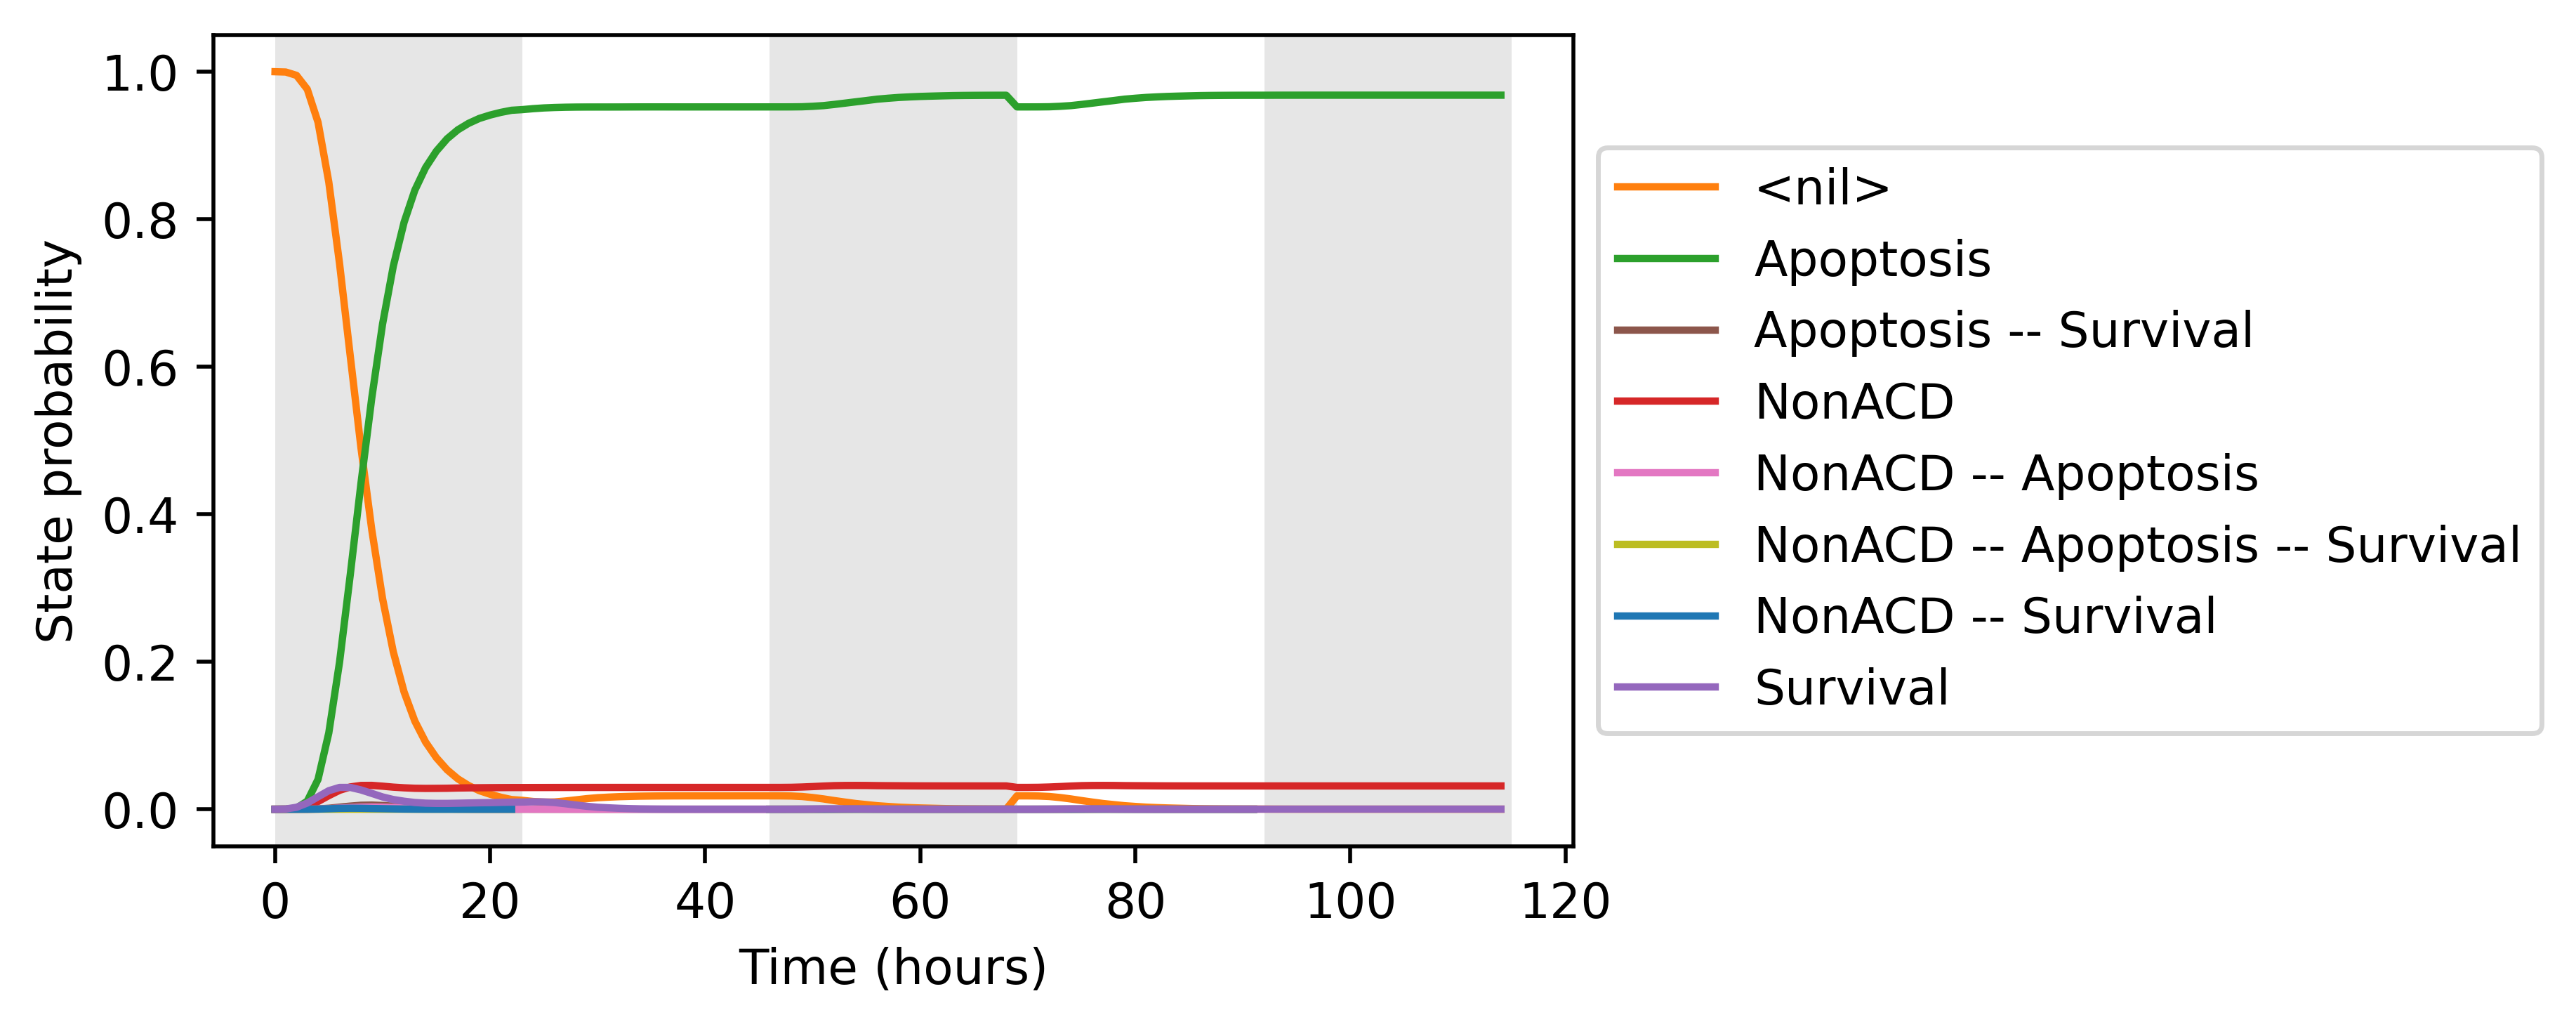

In [ ]:
fig = plt.figure(figsize=(5,3), dpi=500)
fig.subplots(1)
pd.concat([table_1, table_2, table_3, table_4, table_5]).plot(ax=fig.axes[0],color=['C1', 'C2', 'C5', 'C3', 'C6', 'C8', 'C0', 'C4'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Time (hours)')
plt.ylabel('State probability')
fig.axes[0].axvspan(0., dur_tnf-1, facecolor='0.9')
fig.axes[0].axvspan(dur_tnf+dur_no_tnf-2, dur_tnf+dur_no_tnf+dur_tnf-3, facecolor='0.9')
fig.axes[0].axvspan(dur_tnf+dur_no_tnf+dur_tnf+dur_no_tnf-4, dur_tnf+dur_no_tnf+dur_tnf+dur_no_tnf+dur_tnf-5, facecolor='0.9')

To conclude this last part, with pulsative treatments we can observe a behaviour which couldn't be seen with a permanent treatment : the population of cells surviving the TNF treatment (resistant cells) can be destroyed by the alternance of treatment and pauses. 